In [104]:
%pylab inline

from sharpy.sharad import *
log.getLogger().setLevel(log.INFO)

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['datetime', 'log']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [106]:

# filepath = r"/home/luca/Code/sharpy.git/notebooks/sharad_data/s_00525702_rgram.lbl"

# # Open the file:
# raster = gdal.Open(filepath)
# raster

In [108]:

    

img = getSharadDefaultRemoteProducts()[0]
img.hasLoader()

True

In [111]:

# import geopandas as gpd

# # Read points from shapefile
# pts = gpd.read_file('your_point_shapefile.shp')
# pts = pts[['UTM_E', 'UTM_N', 'Value', 'geometry']]
# pts.index = range(len(pts))
# coords = [(x,y) for x, y in zip(pts.UTM_E, pts.UTM_N)]

# # Open the raster and store metadata
# src = rasterio.open('your_raster.tif')

# # Sample the raster at every point location and store values in DataFrame
# pts['Raster Value'] = [x for x in src.sample(coords)]
# pts['Raster Value'] = probes.apply(lambda x: x['Raster Value'][0], axis=1)

In [112]:
m = SharadRadagramsManager()
m.loadDatabase()
r1 = m.getRadargram('00525702')
# m.downloadProduct('00525702', "JPG", 0)
# m.downloadProducts(['00525702', '00203001'], ["JPG", "JPG_LBL", "GEOM", "GEOM_LBL", "TIFF", "TIFF_LBL"])


INFO:fiona.ogrext:Failed to auto identify EPSG: 7


In [132]:
pts = np.array([(a.coords.xy[0][0], a.coords.xy[1][0]) for a in r1.getTrack().to_crs(n_pole_stereo_crs).geometry])

In [79]:
gpd.GeoDataFrame([r1.getTrack()]).crs

In [70]:

pts = r1.getTrackNumpy()

In [65]:
d.crs

In [133]:
import rasterio
raster = "/run/media/luca/data/SciBigData/radargrams/mola_polar_megt_512pd/megt_n_512_1/"
d = rasterio.open(raster)
ll = np.array(list(d.sample(pts.tolist())))

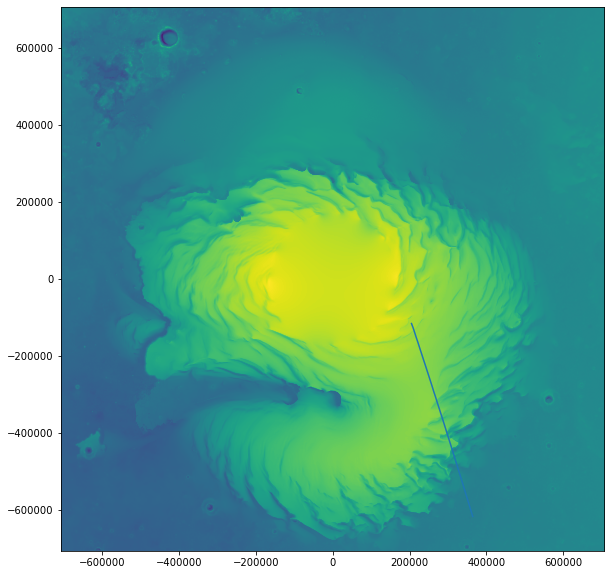

In [140]:
from rasterio.plot import show
figure(figsize=(10,10))
plot(*pts.T)
show(d)


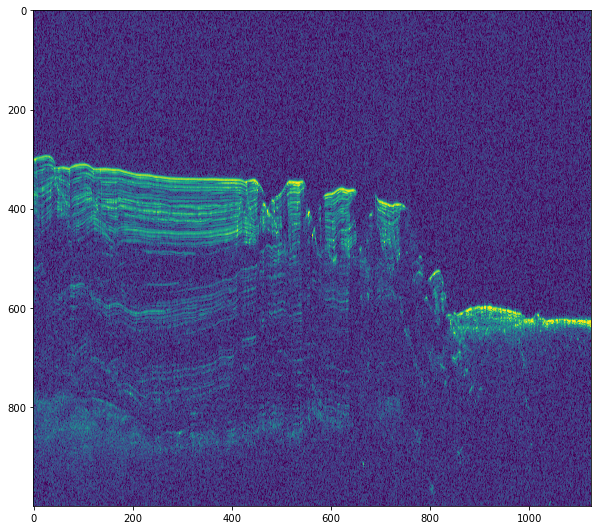

In [147]:
figure(figsize=(10,10))
imshow(r1.getProduct("JPG")[2000:3000,:])

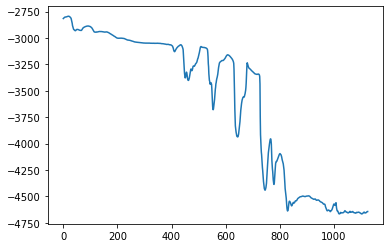

In [135]:
plot(ll)

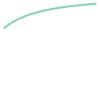

In [33]:
from shapely.geometry import Point, LineString, MultiLineString
r = r1.getProduct("GEOM")

track = LineString([Point(xy) for xy in zip(r.longitude, r.latitude)])

In [284]:
r

,radargram_column,time,latitude,longitude,mars_radius,spacecraft_radius,radial_velocity,tangential_velocity,sza,phase_1.0e16
0,1,2007-09-10T02:26:08.407,86.0491,60.5516,3378.300,3693.851,2.0341,3395.7214,109.59,0.0
1,2,2007-09-10T02:26:08.544,86.0435,60.4876,3378.300,3693.851,2.0379,3395.7236,109.60,0.0
2,3,2007-09-10T02:26:08.704,86.0370,60.4130,3378.301,3693.851,2.0424,3395.7261,109.60,0.0
3,4,2007-09-10T02:26:08.841,86.0315,60.3490,3378.301,3693.850,2.0463,3395.7283,109.61,0.0
4,5,2007-09-10T02:26:09.001,86.0250,60.2744,3378.301,3693.850,2.0508,3395.7308,109.61,0.0
...,...,...,...,...,...,...,...,...,...,...
1121,1122,2007-09-10T02:28:54.626,78.0418,30.5740,3379.016,3693.164,5.9999,3397.1007,116.57,0.0
1122,1123,2007-09-10T02:28:54.763,78.0347,30.5656,3379.017,3693.163,6.0026,3397.1008,116.58,0.0
1123,1124,2007-09-10T02:28:54.923,78.0266,30.5558,3379.018,3693.162,6.0057,3397.1009,116.59,0.0
1124,1125,2007-09-10T02:28:55.060,78.0195,30.5475,3379.019,3693.161,6.0084,3397.1010,116.59,0.0


In [56]:
download_data_for_sharad_id??

Signature:
download_data_for_sharad_id(
    items_id_string,
    folder='.',
    everything=True,
    exclude=[],
)
Docstring: <no docstring>
Source:   
def download_data_for_sharad_id(items_id_string, folder=".", everything=True, exclude=[]):
    items = np.atleast_1d(items_id_string)
    for i in items:
        for prodname, urlf in products.items():
            if prodname in exclude:
                log.debug(f"Skipping product {prodname} as requested")
                continue
                
            url = urlf(i)
            log.debug(f"downloading {url}")

            download_http_url(url, folder)
File:      ~/Code/sharpy.git/sharpy/sharad.py
Type:      function


In [ ]:
from sharpy.sharad